In [15]:
import matplotlib.pyplot as plt

In [45]:
import os
import json

# Define the path to the results folders
results_folder = 'results'

# Get the list of folders in the results folder
folders = os.listdir(results_folder)
data_dict = {}

# Iterate over the folders
for folder in folders:
    # Construct the path to the results.json file
    results_file = os.path.join(results_folder, folder, 'data/results.json')
    with open(results_file, 'r') as f:
        data = json.load(f)
    
    # Split the folder name by underscore and select the part you need
    edited_folder_name = '_'.join(folder.split('_')[2:])

    # Store the data in the dictionary, using the edited folder name as the key
    data_dict[edited_folder_name] = data

In [51]:
del data_dict['transformer_MLP_512']

In [53]:
data_dict.keys()

dict_keys(['vanilla_classifier', 'softmax', 'transformer_linear_512'])

In [54]:
deltas = data_dict['softmax']['deltas']
lambda_list = [(key, data_dict[key]['lambdas']) for key in data_dict.keys()]
L_val_list = [(key, data_dict[key]['L_vals']) for key in data_dict.keys()]
exit_layer_list = [(key, [dic['predict_block_avg'] for dic in data_dict[key]['metrics']]) for key in data_dict.keys()]

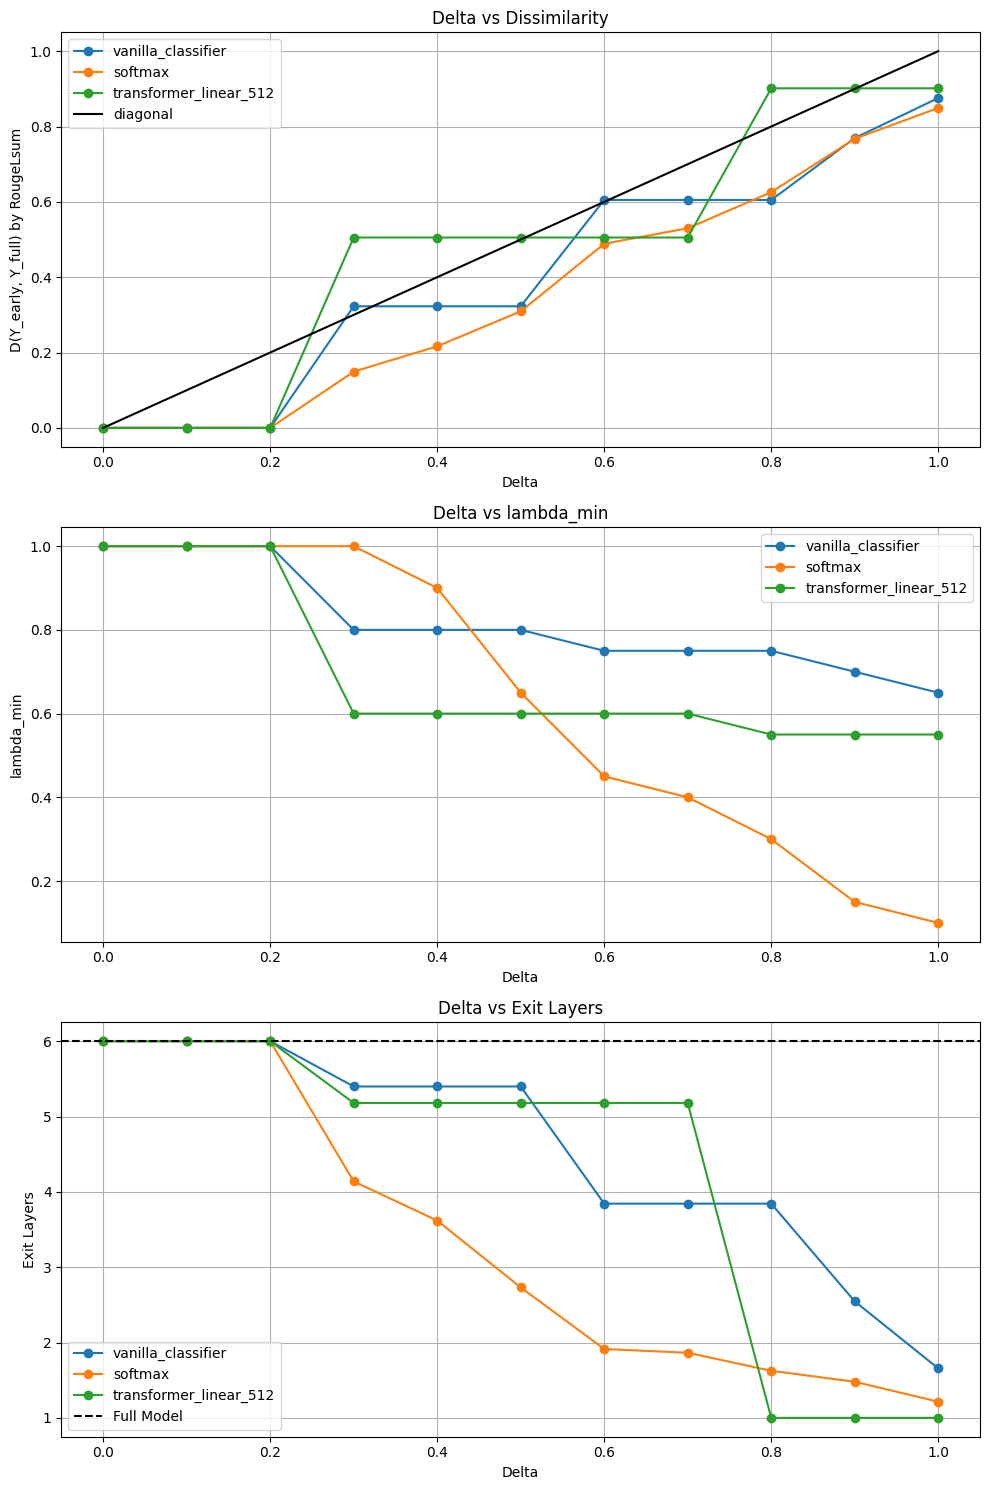

In [55]:

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for name, model_performance in L_val_list:
    axs[0].plot(deltas, model_performance, marker='o', label=f'{name}')

# Adding labels and title
axs[0].plot([0, 1], [0, 1], color='black', label='diagonal')
axs[0].set_title('Delta vs Dissimilarity')
axs[0].set_xlabel('Delta')
axs[0].set_ylabel('D(Y_early, Y_full) by RougeLsum')
axs[0].grid(True)
axs[0].legend()

for name, model_performance in lambda_list:
    axs[1].plot(deltas, model_performance, marker='o', label=f'{name}')

# Adding labels and title
axs[1].set_title('Delta vs lambda_min')
axs[1].set_xlabel('Delta')
axs[1].set_ylabel('lambda_min')
axs[1].grid(True)
axs[1].legend()

for name, model_performance in exit_layer_list:
    axs[2].plot(deltas, model_performance, marker='o', label=f'{name}')

# Adding labels and title
axs[2].set_title('Delta vs Exit Layers')
axs[2].axhline(y=6, color='black', linestyle='--', label='Full Model')  # Add horizontal line
axs[2].set_xlabel('Delta')
axs[2].set_ylabel('Exit Layers')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()

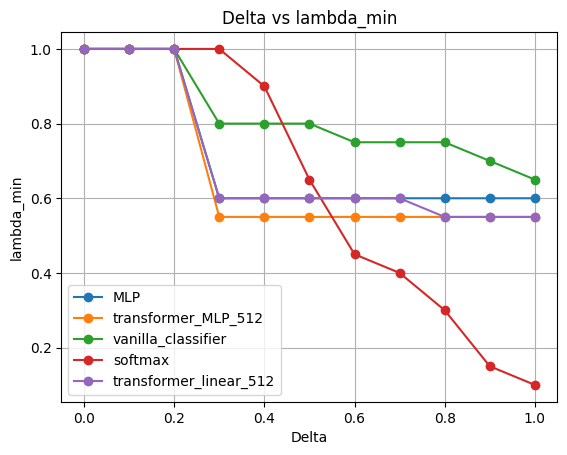

In [18]:
for name, model_performance in lambda_list:
    plt.plot(deltas, model_performance, marker='o', label=f'{name}')

# Adding labels and title
plt.title('Delta vs lambda_min')
plt.xlabel('Delta')
plt.ylabel('lambda_min')
plt.grid(True)
plt.legend()

# Show plot
plt.show()

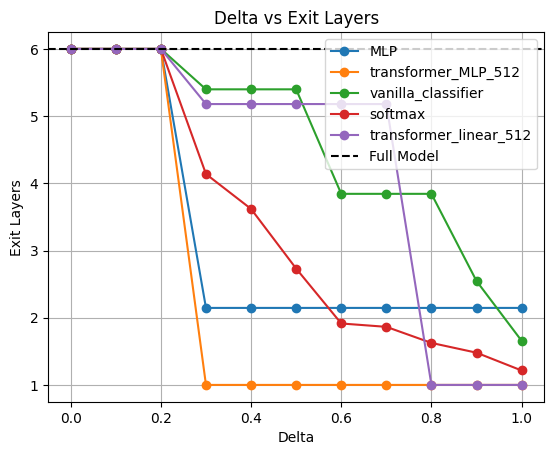

In [31]:
for name, model_performance in exit_layer_list:
    plt.plot(deltas, model_performance, marker='o', label=f'{name}')

# Adding labels and title
plt.title('Delta vs Exit Layers')
plt.axhline(y=6, color='black', linestyle='--', label='Full Model')  # Add horizontal line
plt.xlabel('Delta')
plt.ylabel('Exit Layers')
plt.grid(True)
plt.legend()

# Show plot
plt.show()